#  Telco Customer Churn Analysis
---
**Name:** Ronald Wanjohi Gachoka <br>
**Student Number:** S2274825 <br>
**Course:** Software Development for Data Science <br>
**Assignment:** Coursework 2 <br>
**Program:** MSc Financial Technology 

---
---


## 1. Business Understanding

Customer churn is the rate at which customers stop doing business with a specific organization (Frankenfield, 2022). This is is especially important for company's as it essentially measures a company's ability to retain customers. Its helpful to not only look at the churn rate as what will be identified in this analysis but also compare it to the company's growth rate (which will not be covered in this project). This is because if the churn rate is higher than the growth rate then the company is losing customers faster than it is gaining them.  

In the competitive space of telecommunications (telco) companies, customer churn is a key metric that companies use to evaluate their performance as it impacts their profitability and brand recognition (Wagh, et al., 2024). According to Wagh, et al., (2024), he states that in some cases, the cost of acquiring a new customer is 5x more expensive than retaining an existing customer. This is why it is important for companies to identify the key factors that lead to customers churning. Several factors can lead to a business churning customers such as high prices, poor customer service, poor product quality and much more. 

Despite this project not being able to identify the exact reason why customers churn such as an increase in prices or a competitor offering new  services, it will try identify the key factors that lead to customers churning. This will be done by building a model that will predict whether a customer will churn or not.

### 1.1. Objectives

The main objective of this coursework project is to build a model that can identify customers who are at risk of churning. This will be done by answering the following questions:
- What is the churn rate of the company?
- What is the average tenure of customers?
- What is the average monthly charges of customers?
- What are the key factors that dictate whether a customer will churn or not?
- How do churn rates vary across different customer demographics?

### 1.2. Success Criteria

1. Successfully predict whether a customer will churn or not with an accuracy of 90% or higher on unseen data.
2. Identify the key factors that dictate whether a customer will churn or not.
3. Aim for a precision score of 0.85 or higher to reduce the number of false positives.
4. Aim for a recall score of 0.85 or higher to reduce the number of false negatives.



**Methodology**
To achieve these goals, the coursework will involve the following steps which is in line with the CRISP-DM methodology (Smart Vision, 2020):
> - Business Understanding
> - Data Understanding
> - Data Preparation 
> - Modelling
> - Evaluation

For this coursework we will not deploy the model, but we will evaluate the model and make recommendations based on the results.

## 2. Data Understanding

The dataset we've been provided with is a Telco customer churn data from California, USA. The data is available at [Telco Customer Churn - Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn) and has 7,043 customers with multiple features from  `OnlineSecurity`, `Contract` type, `Charges`, `Dependents` amongst many more. The target variable is the `Churn` column which is a binary variable with Yes or No values.

This section will include:
> - Data Collection
> - Data Description
> - Data Exploration
> - Data Quality


**Load Libraries**


In [278]:
# Data Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


# Styling & Settings
sns.set_style("whitegrid")
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
%matplotlib inline

**Load Data**

In [46]:
df = pd.read_csv("Telco-Customer-Churn.csv")
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


We can see a high-level overview of our data and what each of the columns may contain. We can also see that there are 7,043 rows and 21 columns.

**Summary of the data**

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We can see that all columns have the same number of non-null values which is 7,043. This means that there are no missing values in the dataset.

We can also see `TotalCharges` is an object type and not a numerical type. We will need to convert this to a numerical type in the next section. 

In [48]:
# Summary statistics (numerical)
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Based of the above summary statistics we can see the we do not have any inacurrate outliers in our dataset as the minimum and maximum values are within the expected range 

In [49]:
# Summary statistics (categorical)
df.describe(include=['O']) 

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


### Data Description

Below is a description of each column in the dataset. This will help us understand what each column represents and what type of data it contains.

| Column Name | Description | Type | Subtype |
| :---: | :---: | :---: | :---: |
| Senior Citizen | Whether the customer is a senior citizen or not | Numerical | Binary |
| Tenure | Number of months the customer has stayed with the company | Numerical | Discrete |
| Monthly Charges | The amount charged to the customer monthly | Numerical | Continuous |
| CustomerID | Customer ID | Categorical | Nominal |
| Gender | Is the customer male or female | Categorical | Nominal |
| Partner | Whether the customer has a partner or not | Categorical | Nominal |
| Dependents | Whether the customer has dependents or not | Categorical | Nominal |
| Phone Service | Whether the customer has a phone service or not | Categorical | Nominal |
| Multiple Lines | Whether the customer has multiple lines or not | Categorical | Nominal |
| Internet Service | Customer’s internet service provider (DSL, Fiber optic, No) | Categorical | Nominal |
| Online Security | Whether the customer has online security or not | Categorical | Nominal |
| Online Backup | Whether the customer has online backup or not | Categorical | Nominal |
| Device Protection | Whether the customer has device protection or not | Categorical | Nominal |
| Tech Support | Whether the customer has tech support or not | Categorical | Nominal |
| Streaming TV | Whether the customer has streaming TV or not | Categorical | Nominal |
| Streaming Movies | Whether the customer has streaming movies or not | Categorical | Nominal |
| Contract | The contract term of the customer (Month-to-month, One year, Two year) | Categorical | Nominal |
| Paperless Billing | Whether the customer has paperless billing or not | Categorical | Nominal |
| Payment Method | The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) | Categorical | Nominal |
| Total Charges | The total amount charged to the customer | Numerical | Continuous |
| Churn | Whether the customer churned or not (Yes or No) | Categorical | Nominal |

We can see that we have 2 columns that have incorrect data types:
- `SeniorCitizen` should be a categorical variable
- `TotalCharges` should be a numerical variable

### Data Exploration

In this section we will explore the data to get a better understanding of the data and identify any issues with the data. We will also look at the distribution of the data and identify any outliers.


#### Missing Values



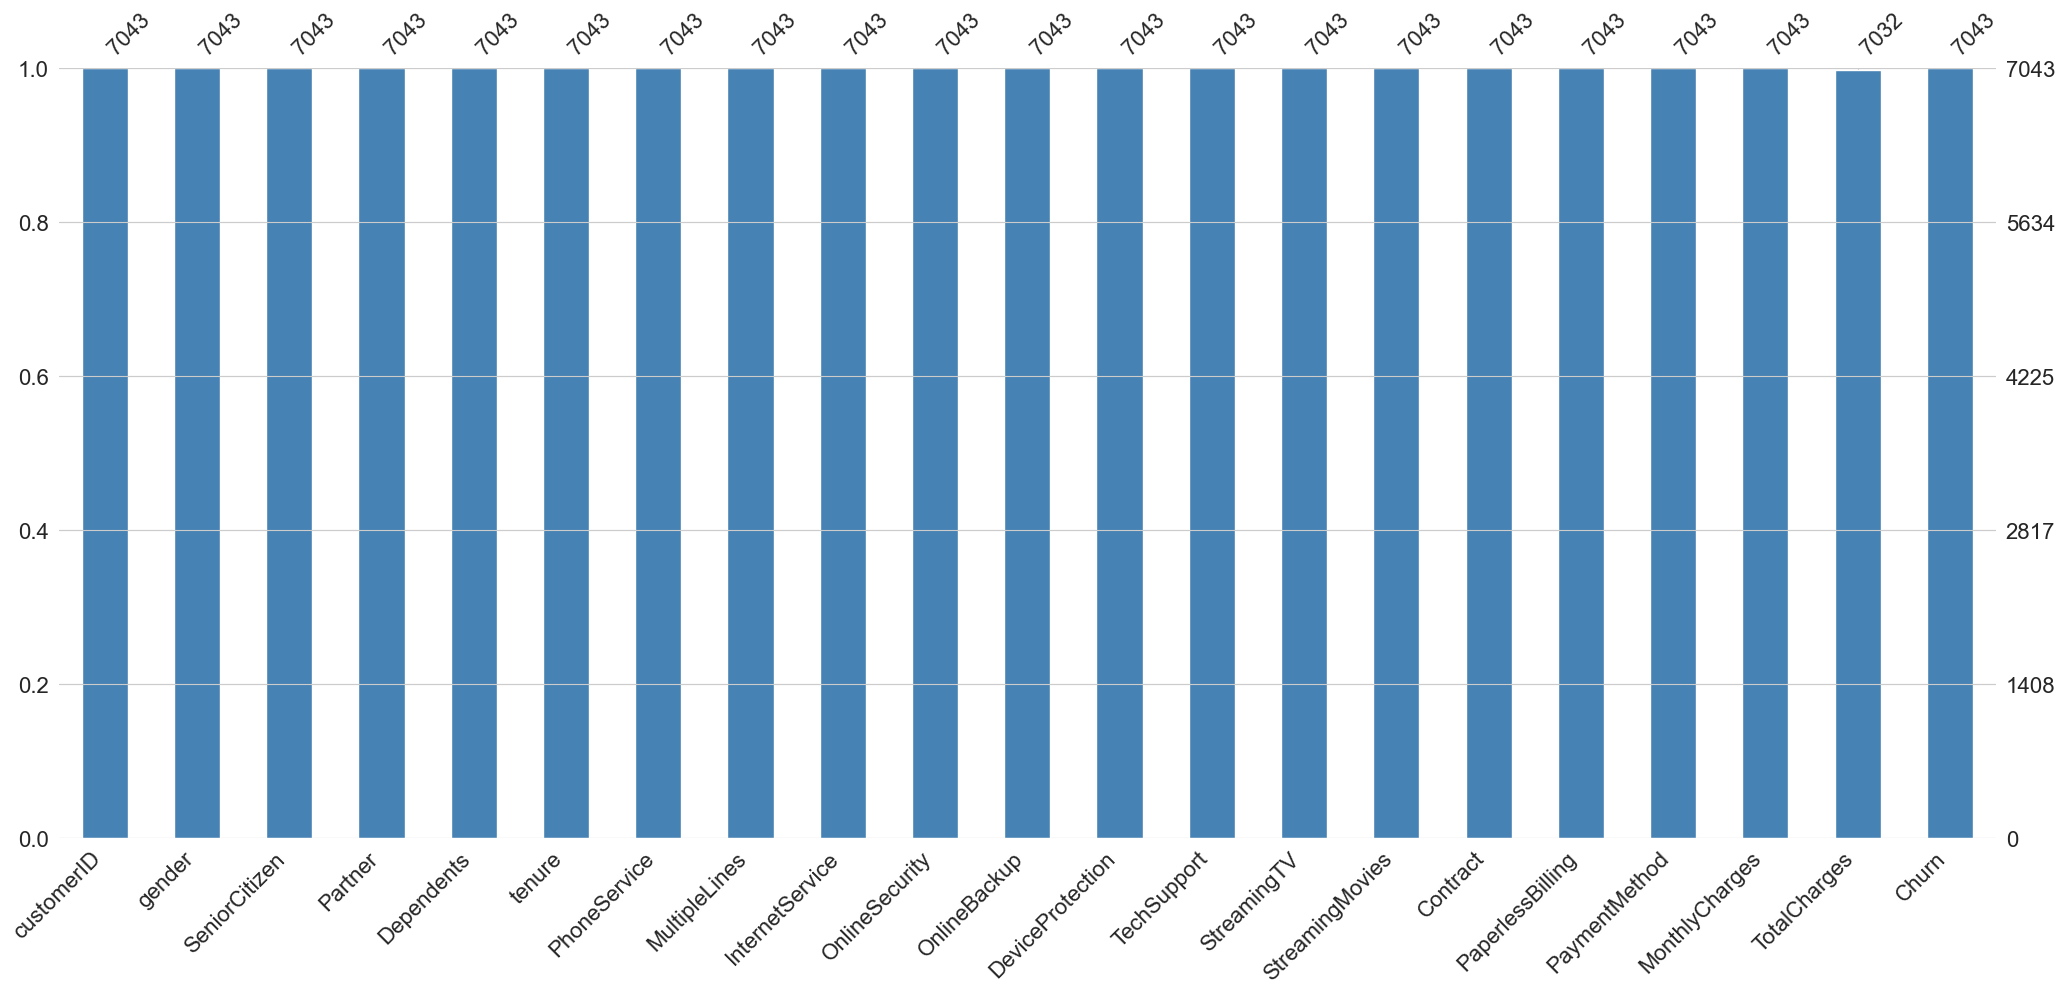

In [260]:
msno.bar(df, color="steelblue");

From the above chart we can see that there are no missing values in the dataset. However, we can't be sure if there are any values that are not missing but are incorrect. We will explore this further in the next section.

#### Duplicates



In [152]:
df.duplicated().any().sum()

0

In [153]:
df['customerID'].duplicated().sum()

0

Based of the 2 code cells above we can see that no row in our data has duplicated values. In addition we did a further check to make sure there are no duplicated customerIDs which is the unique identifier for each customer. This is good as we don't have to worry about removing any duplicated rows.

#### Data Type Consistency

In [148]:
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [150]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df["TotalCharges"].dtype

dtype('float64')

#### Univariate Analysis

In [154]:
def plot_categorical(df:pd.DataFrame, col:str, title:str, xlabel:str, ylabel:str, txt_rotation:int=0):
    """
    Function to plot categorical data
    
    :param df: Name of the dataframe 
    :param col: Column of intereset
    :param title:  Title of the plot
    :param xlabel: X label of the plot
    :param ylabel: Y label of the plot
    """

    # Map binary variables to Yes or No
    mapping = {0: 'No', 1: 'Yes'}  
    if df[col].dtype == 'int64':  
        df[col] = df[col].map(mapping)  
        
    # Print summary stats
    print("Data Statistics:")
    print(df[col].value_counts())
    
    # sns.countplot(x=df[col], data=df)
    sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts())
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=txt_rotation, ha="right")
    plt.show();
    

##### Senior Citizen

Data Statistics:
SeniorCitizen
No     5901
Yes    1142
Name: count, dtype: int64


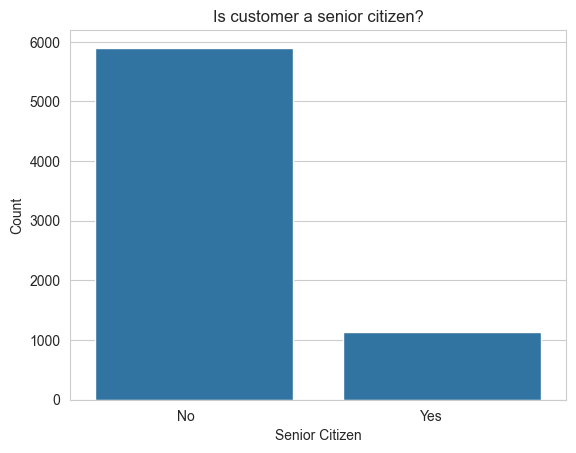

In [155]:
plot_categorical(df=df, col="SeniorCitizen", title="Is customer a senior citizen?", 
                 xlabel="Senior Citizen", ylabel="Count")

Within our dataset, we have slightly over 1,000 senior citizens and just about 6,000 non-senior citizens. This shows that the majority of the telco's customers are not senior citizens which is good for their business as they can effectively capture the younger market.

##### Gender

Data Statistics:
gender
Male      3555
Female    3488
Name: count, dtype: int64


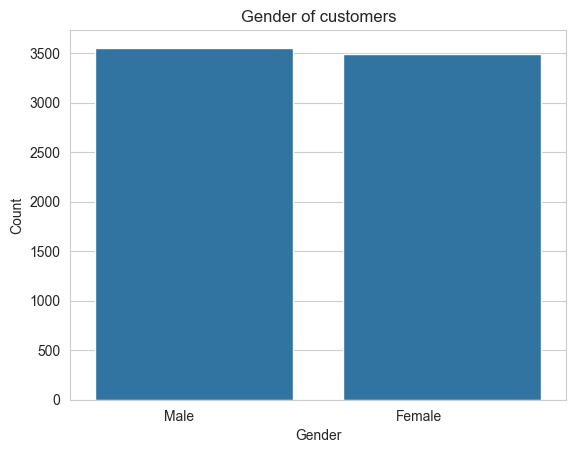

In [156]:
plot_categorical(df=df, col="gender", title="Gender of customers", xlabel="Gender", ylabel="Count")

The dataset is very close to being evenly split between male and female customers at 3,500.

##### Partner

Data Statistics:
Partner
No     3641
Yes    3402
Name: count, dtype: int64


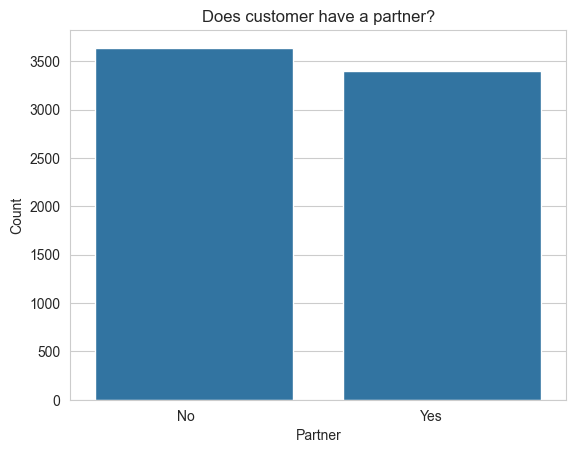

In [157]:
plot_categorical(df=df, col="Partner", title="Does customer have a partner?", xlabel="Partner", ylabel="Count")

The dataset is also very close to being evenly split between customers who have a partner and those who don't.

##### Dependents

Data Statistics:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64


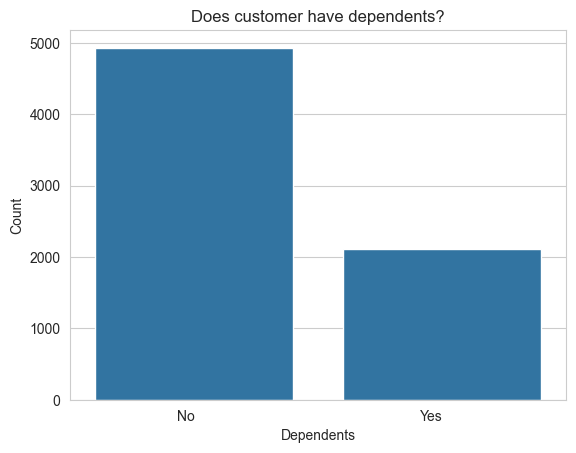

In [158]:
plot_categorical(df=df, col="Dependents", title="Does customer have dependents?", 
                 xlabel="Dependents", ylabel="Count")

Most of the customers do not have dependents which could be closely linked to the low number of senior citizens in the dataset.

##### Phone Service

Data Statistics:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64


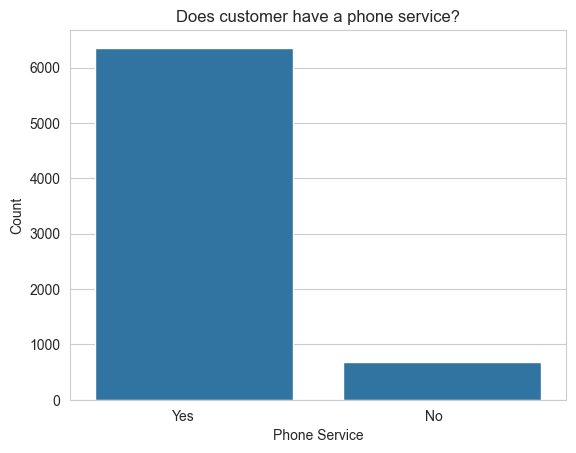

In [159]:
plot_categorical(df=df, col="PhoneService", title="Does customer have a phone service?", 
                 xlabel="Phone Service", ylabel="Count")

The majority of the customers have a phone service which is good for the telco as they can offer them other services such as Internet service, device protection or other services. The disparity between the customers who have a phone service and those who don't is quite large which was to be expected.

##### Multiple Lines

Data Statistics:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


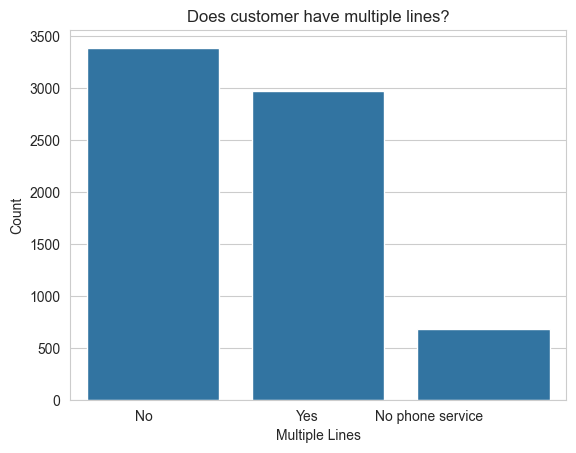

In [160]:
plot_categorical(df=df, col="MultipleLines", title="Does customer have multiple lines?", 
                 xlabel="Multiple Lines", ylabel="Count")

The majority of the customers do not have multiple lines which is to be expected as most customers will usually have only one line. However, what's interesting is that nearly 3,000 customers have multiple lines which is a large number. In addition, over 500 customers have no phone service which was unexpected.

##### Internet Service

Data Statistics:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


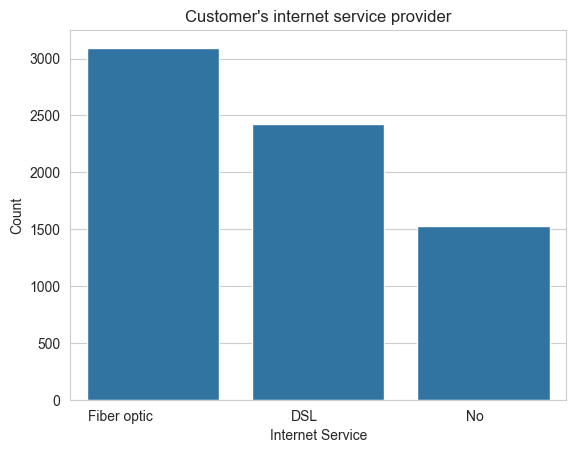

In [161]:
plot_categorical(df=df, col="InternetService", title="Customer's internet service provider",
                 xlabel="Internet Service", ylabel="Count")

The majority of the customers have `Fiber Optic` internet service, this could be due to higher internet speeds or lower prices. The number of customers who have `DSL` is also quite high at just about 2,500 which is good for competition and maintaining a healthy market share. 

##### Online Security

Data Statistics:
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


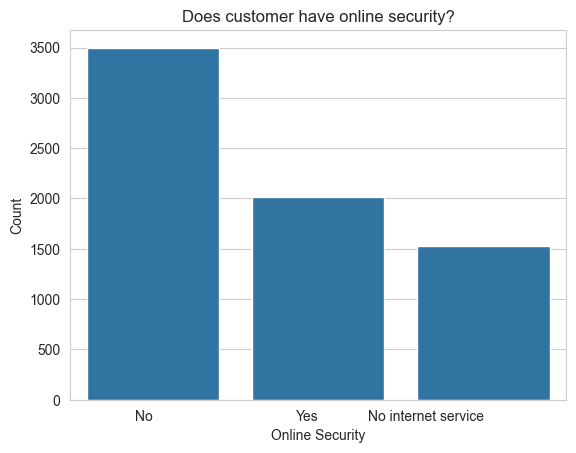

In [162]:
plot_categorical(df=df, col="OnlineSecurity", title="Does customer have online security?", 
                 xlabel="Online Security", ylabel="Count")

This column indicates whether a customer has subscribed to additional online security service provided by the company. Approximately 3,500 customers do not have online security compared to 2,000 who have. What's interesting is that about 1,500 have been categorizes as not having an internet service. 

This could be either miscategorized as if they didn't have an internet service, one would have expected them to have been categorized as `No`

##### Online Backup

Data Statistics:
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64


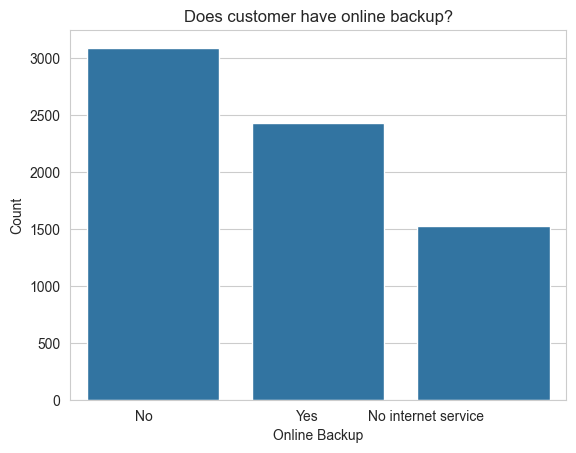

In [163]:
plot_categorical(df=df, col="OnlineBackup", title="Does customer have online backup?", 
                 xlabel="Online Backup", ylabel="Count")

Slightly over 3,000 customers have not subscribed to an additional online backup service from the telco company compared to 2,000 who have. 
As this is a paid for service, the telco company may consider this service when looking at their churn rate.

##### Device Protection

Data Statistics:
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64


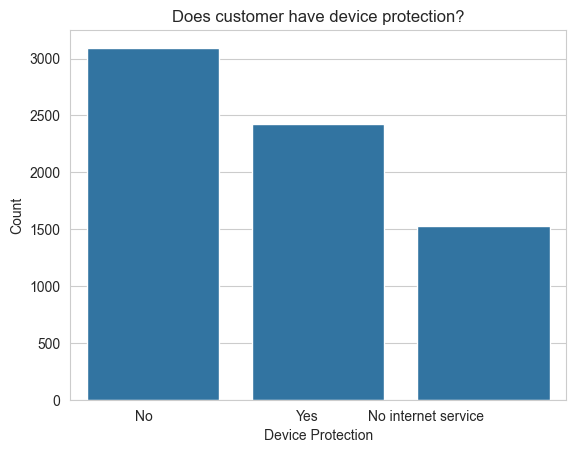

In [164]:
plot_categorical(df=df, col="DeviceProtection", title="Does customer have device protection?", 
                 xlabel="Device Protection", ylabel="Count")

The above chart indicates the number of customers who have subscribed to an additional device protection service from the telco company. The number of customers who have not subscribed to this service is slightly over 3,000 compared to about 2,500 who have. This can be a good indicator for the telco company to see if they can improve their device protection service to attract more customers.

##### Tech Support

Data Statistics:
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64


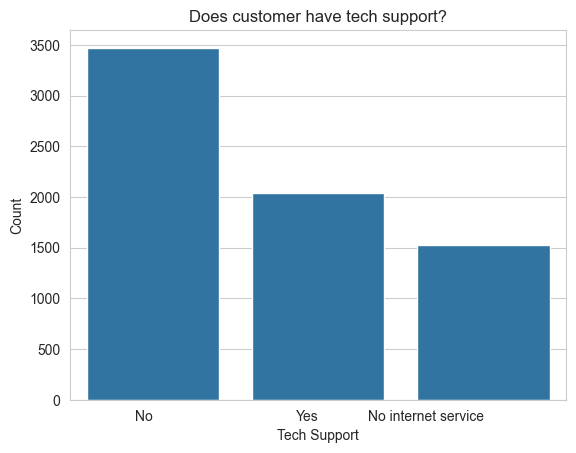

In [165]:
plot_categorical(df=df, col="TechSupport", title="Does customer have tech support?", 
                 xlabel="Tech Support", ylabel="Count")

This chart shows the proportion of customer who have subscribed to an additional tech support service from the telco company. The number of customers who have not subscribed to this service is slightly below 3,500 compared to about 2,000 who have. This can be a good indicator for the telco company to see if they can improve their tech support service to attract more customers either by improving the service or reducing the price.

##### Streaming TV

Data Statistics:
StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64


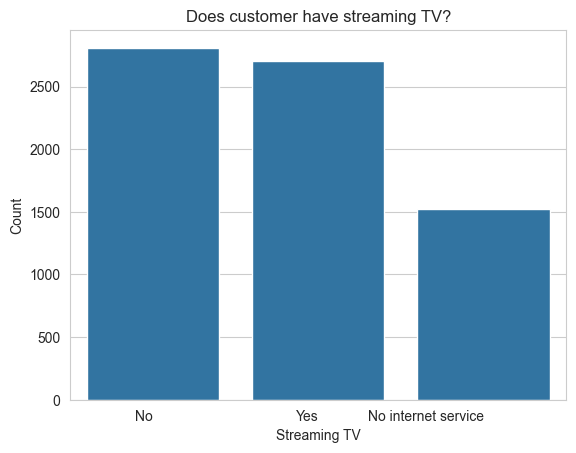

In [166]:
plot_categorical(df=df, col="StreamingTV", title="Does customer have streaming TV?", 
                 xlabel="Streaming TV", ylabel="Count")

The amount of telco customers who didn't use the telco's services to stream TV from a 3rd party provider is approximately 2,800 customers which is evenly split with the ones who did. However, as this is not a paid for service, the telco company may not be too concerned about this as they are not losing out on revenue.

##### Streaming Movies

Data Statistics:
StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64


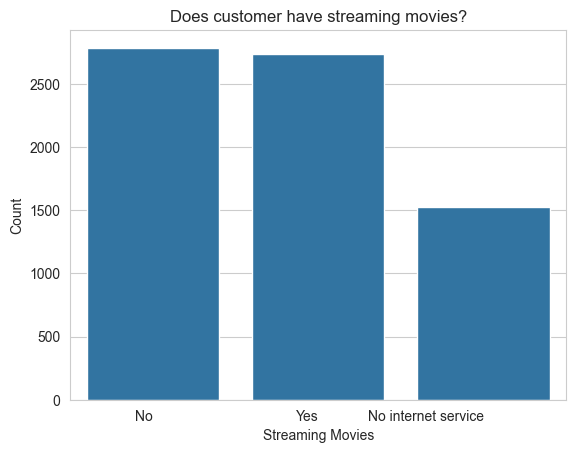

In [167]:
plot_categorical(df=df, col="StreamingMovies", title="Does customer have streaming movies?", 
                 xlabel="Streaming Movies", ylabel="Count")

There's an even split between the customers who use the telco's services for streaming movies and those who don't at around 2,700 customers. However, about 1,500 customers have been categorized as not having an internet service and can't use the telco's service for streaming movies. As this is also not a paid for service, the telco company may not be too concerned about this as they are not losing out any revenue from these customers.

##### Billing Type

Data Statistics:
PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64


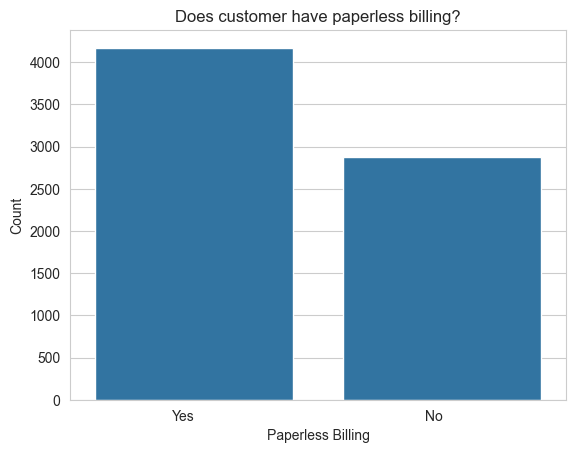

In [168]:
plot_categorical(df=df, col="PaperlessBilling", title="Does customer have paperless billing?", 
                 xlabel="Paperless Billing", ylabel="Count")

The majority of the customers have paperless billing which is to be expected as it is more convenient for customers and the company. However, the number of customers who do not have paperless billing is quite high at 2,872 customers.

##### Payment Method

Data Statistics:
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


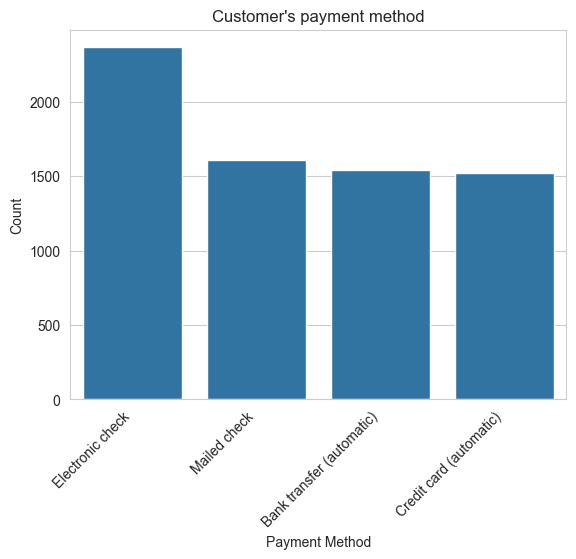

In [169]:
plot_categorical(df=df, col="PaymentMethod", title="Customer's payment method", 
                 xlabel="Payment Method", ylabel="Count", txt_rotation=45)

The most common payment method is electronic check with over 2,000 customers. This wasn't expected as one would expect for a telco company in California, USA to have more customers paying via credit card or bank transfer.

##### Contract Type

Data Statistics:
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


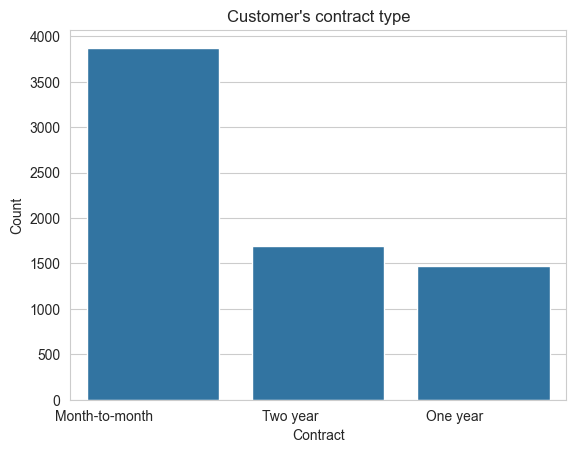

In [170]:
plot_categorical(df=df, col="Contract", title="Customer's contract type", 
                 xlabel="Contract", ylabel="Count")

Most of the telco customers are on a month-to-month contract which is to expected as not most people would want to be tied down to long-term contracts. What is interesting is that there are nearly 2,000 customers on a two-year contract which is more than the one-year contract customers which is not what one would expect. 

##### Churn

Data Statistics:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


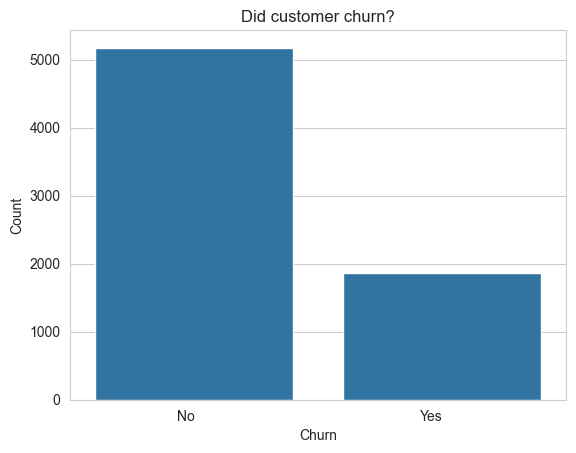

In [171]:
plot_categorical(df=df, col="Churn", title="Did customer churn?", 
                 xlabel="Churn", ylabel="Count") 

From the graph above we can see that nearly 5,000 customers did not churn compared to about 2,000 who did. This is a good sign for the telco company as they have a high retention rate. However, the challenge this may bring during modelling is the class imbalance between the churned and non-churned customers.

In [172]:
def plot_numerical(df:pd.DataFrame, columns:str, title:str, xlabel:str, ylabel:str, kde:bool = True):
    """
    This function plot the distribution of the stated columns in a dataframe.

    :param df: Dataframe to be used
    :param columns: Columns for visualizing
    :param title: Title for distribution
    :param xlabel: X label 
    :param ylabel: Y label
    """
    print("Summary statistics:")
    print(df[columns].describe())

    fig, (ax_box, ax_hist) = plt.subplots(nrows=2, ncols=1,
                                          sharex=True, figsize=(8,4),
                                          gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(df[columns], ax=ax_box, color="salmon", orient="h")
    sns.histplot(df[columns], ax=ax_hist, color="steelblue", kde=kde)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.suptitle(title)
    
    

##### Tenure

Summary statistics:
count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


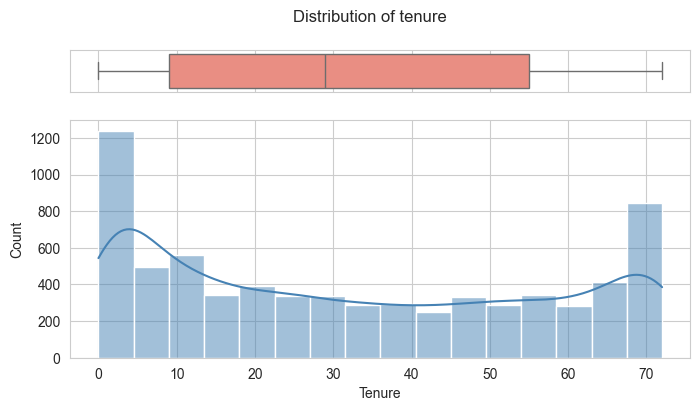

In [173]:
plot_numerical(df=df, columns="tenure", title="Distribution of tenure", 
               xlabel="Tenure", ylabel="Count")

The above distribution shows the total months a customer has been with the telco company. We can see that the average tenure is 32 months with the median being approximately 29 months. 

The distribution also has twin peaks at 0 months and 70 months. 

##### Monthly Charges

Summary statistics:
count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64


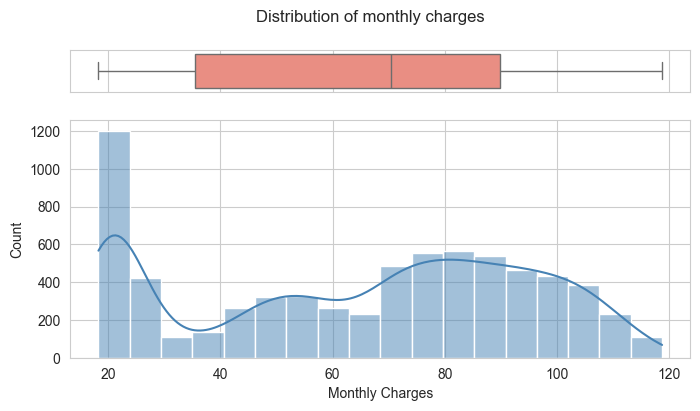

In [174]:
plot_numerical(df=df, columns="MonthlyCharges", title="Distribution of monthly charges", 
               xlabel="Monthly Charges", ylabel="Count")

The above distribution shows the customers current total monthly charge for all their services from the company. The distribution is interestingly shaped as there is a peak at 20 dollars then a dip before another peak at 80 dollars.
The average monthly charge is 64.76 dollars and a maximum of 118.75 dollars which is quite high.

##### Total Charges

Summary statistics:
count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64


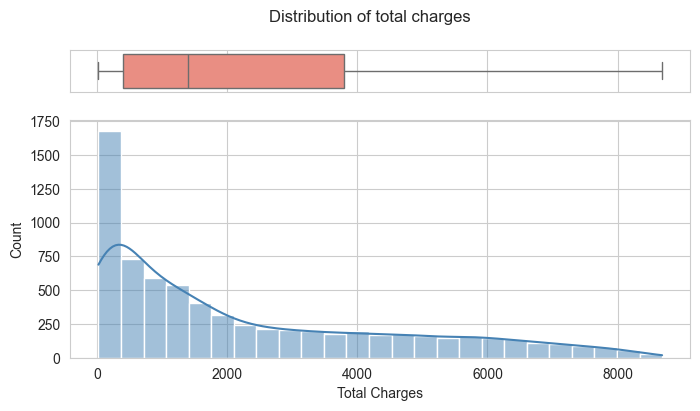

In [176]:
plot_numerical(df=df, columns="TotalCharges", title="Distribution of total charges", 
               xlabel="Total Charges", ylabel="Count")

The above distribution shows the total amount charged to customers. The distribution is skewed to the right with the 75% of the customers being charged between $\401 - $3794.7 (Q1 - Q3). The averagge total charge is $\2,283 however approximately 25% of the customers are charged less than $401.

#### Bivariate Analysis

In this section we will look at the relationship between the target variable and the other variables in the dataset. This will help us identify which variables have a strong relationship with the target variable and which ones don't.

In [229]:
totalcount = df["SeniorCitizen"].value_counts()
print(totalcount)
groupcount = df.groupby(["SeniorCitizen", "Churn"])["SeniorCitizen"].count().unstack()
groupcount

SeniorCitizen
No     5901
Yes    1142
Name: count, dtype: int64


Churn,No,Yes
SeniorCitizen,,
No,4508,1393
Yes,666,476


In [230]:
group_proportions = groupcount.div(len(df), axis=0)
group_proportions

Churn,No,Yes
SeniorCitizen,,
No,0.640068,0.197785
Yes,0.094562,0.067585


In [287]:
def plot_bivariate(df: pd.DataFrame, x: str, title: str, xlabel: str, ylabel: str, hue: str = None,
                   rotation: int = 0):
    """
    This function plots the relationship between the target variable and another variable.

    :param df: Dataframe to be used
    :param x: X variable
    :param title: Title for distribution
    :param xlabel: X label
    :param ylabel: Y label
    :param hue: Hue variable
    """
    plt.figure(figsize=(12, 8))
    # Calculate proportions relative to the entire dataset
    total_counts = df[x].value_counts().sort_values(ascending=False)
    group_counts = df.groupby([x, hue])[x].count().unstack()
    proportions = group_counts.div(len(df), axis=0)

    # Plotting the grouped bar chart
    ax = proportions.plot(kind='bar', stacked=True, edgecolor='black')

    # Adding annotation
    for i, (index, row) in enumerate(proportions.iterrows()):
        for j, value in enumerate(row):
            x_pos = i + j * 0 - 0.1 * (len(row) - 1)  # Adjust the position for hue
            y_pos = row.head(j + 1).sum() - value / 2
            proportion_text = f"{value:.2%}"
            ax.text(x_pos, y_pos, proportion_text, ha='center', va='center', color="black")

    # Customize the plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(range(len(total_counts)), total_counts.index, 
               rotation=rotation, ha="center")
    plt.legend(title=hue)
    plt.show();

##### Senior Citizens

<Figure size 1200x800 with 0 Axes>

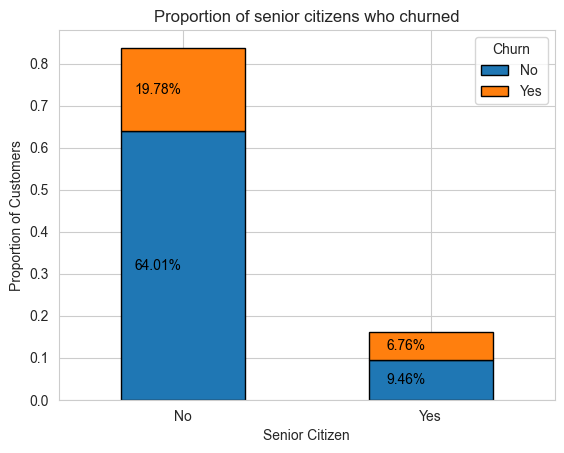

In [288]:
plot_bivariate(df=df, x="SeniorCitizen", title="Proportion of senior citizens who churned", 
               xlabel="Senior Citizen", ylabel="Proportion of Customers", hue="Churn")

From the above chart we can see out of the customers who were registered as non-senior citizens 64.01% did not churn while 19.78% churned. However, the proportion of senior customers who churned vs didn't churn is quite similar at 9.46% vs 6.76%

##### Partner

<Figure size 1200x800 with 0 Axes>

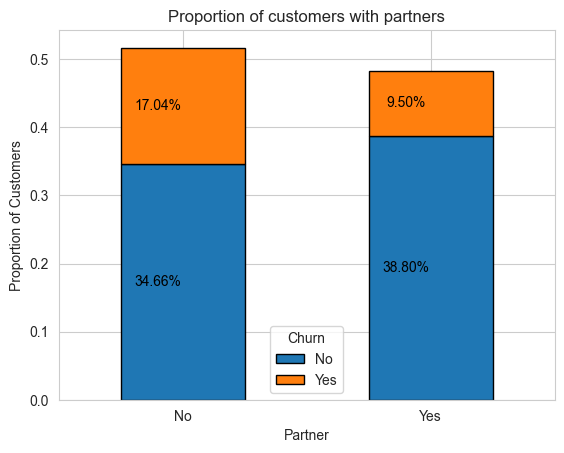

In [289]:
plot_bivariate(df=df, x="Partner", title="Proportion of customers with partners", 
               xlabel="Partner", ylabel="Proportion of Customers", hue="Churn")

From the above chart we can see that the proportion of customers who didn't have a partner and churned is 17.04% of the total customers compared ot 9.50% who had a partner and churned. This would indicate that customers who have a partner are less likely to churn compared to those who don't, however, looking at the proportion of customers who didn't churn, the difference is not that significant.

##### Multiple Lines

<Figure size 1200x800 with 0 Axes>

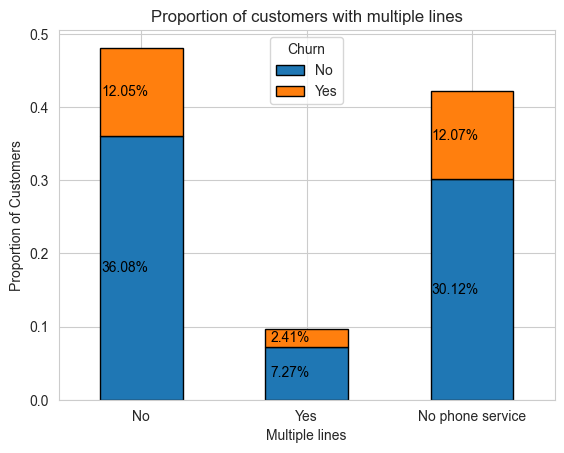

In [290]:
plot_bivariate(df=df, x="MultipleLines", title="Proportion of customers with multiple lines", 
               xlabel="Multiple lines", ylabel="Proportion of Customers", hue="Churn")

From the above chart we can see that the customers who are most likely to churn either have not subscribed to a phone service of haven't subscribed to multiple lines from the telco company. 

##### Internet Service

<Figure size 1200x800 with 0 Axes>

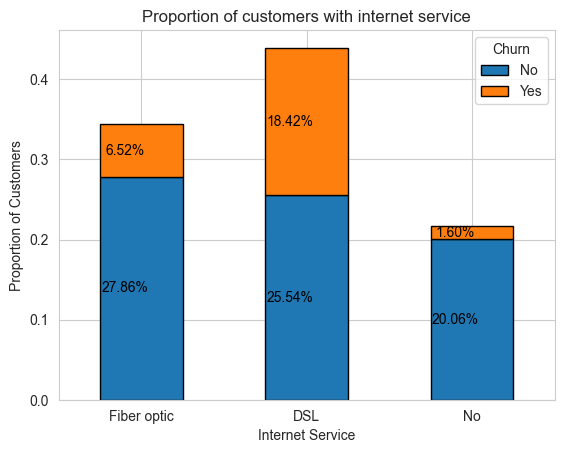

In [291]:
plot_bivariate(df=df, x="InternetService", title="Proportion of customers with internet service", 
               xlabel="Internet Service", ylabel="Proportion of Customers", hue="Churn")

Looking at the above chart we can see that there's a higher chance for a customer to churn if they have subscribed to a DSL internet service. What's interesting is that there are more customers using DSL internet service over Fiber optic service which is up to 100x faster (Socket, n.d.). This could be due to the price of the DSL service being lower than the Fiber optic service.

##### Billing Type

<Figure size 1200x800 with 0 Axes>

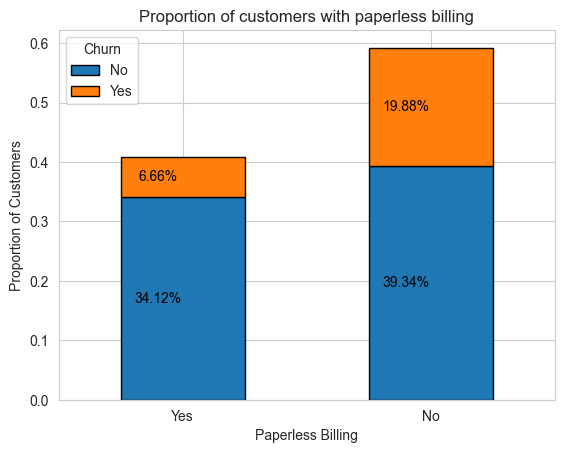

In [292]:
plot_bivariate(df=df, x="PaperlessBilling", title="Proportion of customers with paperless billing", 
               xlabel="Paperless Billing", ylabel="Proportion of Customers", hue="Churn")

From the above chart we can see taht the customers who have not subscribed to paperless billing are more likely to churn (19.88%) compared to those who have paperless billing (6.66%). This could be due to the fact that customers who have paperless billing are more likely to be on a contract and have subscribed to other services from the telco company. 

##### Payment Method

<Figure size 1200x800 with 0 Axes>

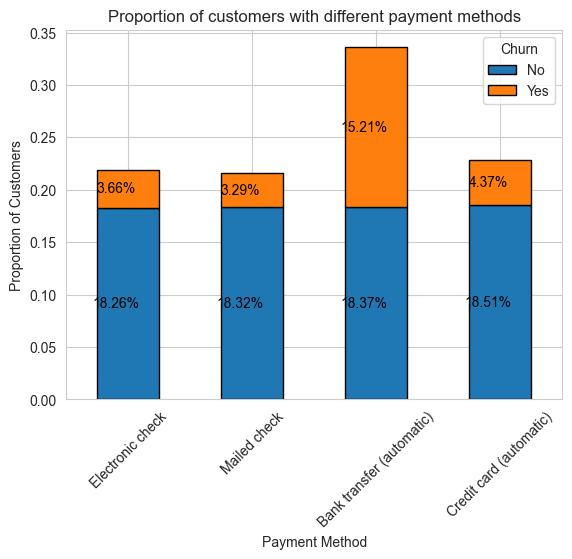

In [293]:
plot_bivariate(df=df, x="PaymentMethod", title="Proportion of customers with different payment methods", 
               xlabel="Payment Method", ylabel="Proportion of Customers", hue="Churn",
               rotation=45)